In [88]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [63]:
df = pd.read_csv('All_NHL_Players_5Goals+_3-8-23.csv')

In [64]:
df

,Rk,Name,Team,Age,Pos,GP,G,A,P,PIM,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,1,Connor McDavid,EDM,25,F,65,54,70,124,26,...,0.831,1.077,1.908,288,18.8%,71,35,413,381,52.02%
1,2,David Pastrnak,BOS,26,F,62,44,40,84,32,...,0.710,0.645,1.355,292,15.1%,69,26,6,9,40.00%
2,3,Mikko Rantanen,COL,26,F,62,42,31,73,56,...,0.677,0.500,1.177,229,18.3%,69,34,154,183,45.70%
3,4,Tage Thompson,BUF,25,F,63,42,41,83,26,...,0.667,0.651,1.317,240,17.5%,37,22,312,408,43.33%
4,5,Leon Draisaitl,EDM,27,F,63,41,55,96,22,...,0.651,0.873,1.524,191,21.5%,45,35,605,521,53.73%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,430,Jani Hakanpää,DAL,30,D,64,5,6,11,46,...,0.078,0.094,0.172,64,7.8%,170,106,0,0,0.00%
409,431,Nick Deslauriers,PHI,31,F,64,5,6,11,99,...,0.078,0.094,0.172,61,8.2%,244,22,1,6,14.29%
410,432,J.J. Moser,ARI,22,D,64,5,19,24,31,...,0.078,0.297,0.375,66,7.6%,61,95,0,0,0.00%
411,433,Casey Cizikas,NYI,31,F,65,5,12,17,52,...,0.077,0.185,0.262,84,6.0%,156,46,414,361,53.42%


In [65]:
df['Shot_Percentage'] = df.apply(lambda x:  x['G'] / x['SHOTS'], axis=1 )

In [66]:
df

,Rk,Name,Team,Age,Pos,GP,G,A,P,PIM,...,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%,Shot_Percentage
0,1,Connor McDavid,EDM,25,F,65,54,70,124,26,...,1.077,1.908,288,18.8%,71,35,413,381,52.02%,0.187500
1,2,David Pastrnak,BOS,26,F,62,44,40,84,32,...,0.645,1.355,292,15.1%,69,26,6,9,40.00%,0.150685
2,3,Mikko Rantanen,COL,26,F,62,42,31,73,56,...,0.500,1.177,229,18.3%,69,34,154,183,45.70%,0.183406
3,4,Tage Thompson,BUF,25,F,63,42,41,83,26,...,0.651,1.317,240,17.5%,37,22,312,408,43.33%,0.175000
4,5,Leon Draisaitl,EDM,27,F,63,41,55,96,22,...,0.873,1.524,191,21.5%,45,35,605,521,53.73%,0.214660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,430,Jani Hakanpää,DAL,30,D,64,5,6,11,46,...,0.094,0.172,64,7.8%,170,106,0,0,0.00%,0.078125
409,431,Nick Deslauriers,PHI,31,F,64,5,6,11,99,...,0.094,0.172,61,8.2%,244,22,1,6,14.29%,0.081967
410,432,J.J. Moser,ARI,22,D,64,5,19,24,31,...,0.297,0.375,66,7.6%,61,95,0,0,0.00%,0.075758
411,433,Casey Cizikas,NYI,31,F,65,5,12,17,52,...,0.185,0.262,84,6.0%,156,46,414,361,53.42%,0.059524


In [67]:
df.sort_values(by=['Shot_Percentage'], ascending=False)


,Rk,Name,Team,Age,Pos,GP,G,A,P,PIM,...,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%,Shot_Percentage
23,24,Andrei Kuzmenko,VAN,26,F,62,29,27,56,6,...,0.435,0.903,113,25.7%,11,16,0,0,0.00%,0.256637
285,286,Rafael Harvey-Pinard,MTL,23,F,20,8,4,12,6,...,0.200,0.600,35,22.9%,36,36,0,0,0.00%,0.228571
224,225,Klim Kostin,EDM,23,F,42,10,8,18,55,...,0.190,0.429,44,22.7%,115,11,4,5,44.44%,0.227273
17,18,Jared McCann,SEA,26,F,61,31,19,50,10,...,0.311,0.820,141,22.0%,47,17,23,46,33.33%,0.219858
4,5,Leon Draisaitl,EDM,27,F,63,41,55,96,22,...,0.873,1.524,191,21.5%,45,35,605,521,53.73%,0.214660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,423,Travis Hamonic,OTT,32,D,63,5,9,14,65,...,0.143,0.222,109,4.6%,92,118,0,0,0.00%,0.045872
407,429,Adam Larsson,SEA,30,D,64,5,21,26,35,...,0.328,0.406,114,4.4%,169,132,0,0,0.00%,0.043860
365,366,Victor Hedman,TBL,32,D,60,6,36,42,26,...,0.600,0.700,144,4.2%,74,109,0,0,0.00%,0.041667
371,372,Darnell Nurse,EDM,27,D,65,6,27,33,58,...,0.415,0.508,158,3.8%,112,129,0,0,0.00%,0.037975


In [87]:
# assume we have data for shots scored and shots taken for NHL players
shots_scored = df['G']
shots_taken = df['SHOTS']

# calculate sample mean and variance of shots scored and shots taken
sample_mean = np.mean(shots_scored / shots_taken)
sample_var = np.var(shots_scored / shots_taken)

# calculate alpha and beta using method of moments
alpha = sample_mean * ((1 - sample_mean) / sample_var - 1)
beta = (1 - sample_mean) * ((1 - sample_mean) / sample_var - 1)

# create beta distribution object
dist = stats.beta(alpha, beta)

# calculate mean and variance of distribution
mean, var = dist.stats()

# print results
print("Alpha:", alpha)
print("Beta:", beta)
print("Mean:", mean)
print("Variance:", var)

Alpha: 70.14851006425157
Beta: 531.9800938400597
Mean: 0.11650087640646181
Variance: 0.00017065750411552046


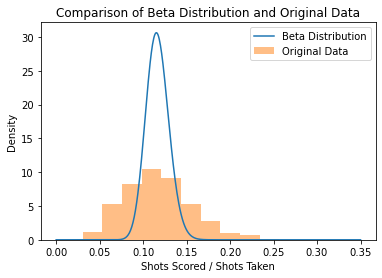

In [95]:
# plot beta distribution
x = np.linspace(0, .35, 500)
pdf = dist.pdf(x)
plt.plot(x, pdf, label="Beta Distribution")

# plot histogram of original data
plt.hist(shots_scored / shots_taken, bins=10, density=True, alpha=0.5, label="Original Data")

# add axis labels and title
plt.xlabel("Shots Scored / Shots Taken")
plt.ylabel("Density")
plt.title("Comparison of Beta Distribution and Original Data")

# add legend
plt.legend()

# show plot
plt.show()

In [103]:
def beta_transform_val(a_pct):
    dist = stats.beta(70.14851006425157, 531.9800938400597)
    transformed_x = dist.ppf(dist.cdf(a_pct))
    return transformed_x

In [104]:
df['Beta_Adjusted_Shot'] = df.apply(lambda x: beta_transform_val(x['G'] /x['SHOTS']),axis=1)

In [106]:
df.columns

Index(['Rk', 'Name', 'Team', 'Age', 'Pos', 'GP', 'G', 'A', 'P', 'PIM', '+/-',
       'TOI', 'ES', 'PP', 'SH', 'ESG', 'PPG', 'SHG', 'GWG', 'OTG', 'ESA',
       'PPA', 'SHA', 'GWA', 'OTA', 'ESP', 'PPP', 'SHP', 'GWP', 'OTP', 'PPP%',
       'G/60', 'A/60', 'P/60', 'ESG/60', 'ESA/60', 'ESP/60', 'PPG/60',
       'PPA/60', 'PPP/60', 'G/GP', 'A/GP', 'P/GP', 'SHOTS', 'SH%', 'HITS',
       'BS', 'FOW', 'FOL', 'FO%', 'Shot_Percentage', 'Beta_Adjusted_Shot'],
      dtype='object')